Stock market prediction with LSTM

In [ ]:
import numpy as np
from numpy.random import seed
seed(1)
import tensorflow
from tensorflow.random import set_seed
set_seed(2)
import pandas
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
df=web.DataReader('PG',data_source ='yahoo',start='2019-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,91.389999,89.930000,91.029999,91.279999,9843900.0,87.124207
2019-01-03,92.500000,90.379997,90.940002,90.639999,9820200.0,86.513344
2019-01-04,92.489998,90.370003,90.839996,92.489998,10565700.0,88.279129
2019-01-07,92.500000,91.400002,91.910004,92.120003,9012500.0,87.925972
2019-01-08,93.089996,91.820000,92.699997,92.459999,9551300.0,88.250481
...,...,...,...,...,...,...
2019-12-11,125.269997,124.070000,124.269997,124.660004,4823300.0,122.330818
2019-12-12,125.760002,123.879997,124.779999,124.570000,5897800.0,122.242500
2019-12-13,125.739998,123.790001,124.209999,125.470001,5471600.0,123.125679


In [ ]:
df.shape

(243, 6)

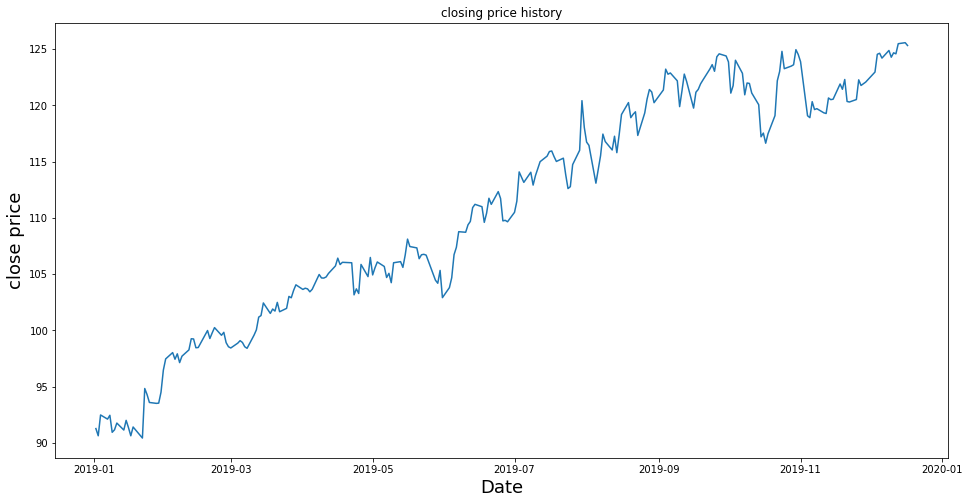

In [ ]:
plt.figure(figsize=(16,8))
plt.title('closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize =18)
plt.ylabel('close price',fontsize=18)
plt.show()

In [ ]:
import math
data=df.filter(['Close'])
dataset =data.values
training_data_len =math.ceil(len(dataset)*0.8)

training_data_len

195

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)

scaled_data

array([[0.02391789],
       [0.00569467],
       [0.05837118],
       [0.04783601],
       [0.057517  ],
       [0.01452149],
       [0.02078576],
       [0.03787   ],
       [0.02021638],
       [0.04470387],
       [0.02648065],
       [0.00569467],
       [0.02790421],
       [0.        ],
       [0.12528458],
       [0.10990892],
       [0.08997712],
       [0.08769916],
       [0.08826876],
       [0.11617297],
       [0.17169703],
       [0.20017084],
       [0.2161161 ],
       [0.19931666],
       [0.21298396],
       [0.19077443],
       [0.20700449],
       [0.22294975],
       [0.25113898],
       [0.25056938],
       [0.22835985],
       [0.22892944],
       [0.27192474],
       [0.25170836],
       [0.26594526],
       [0.27932799],
       [0.25996579],
       [0.26736904],
       [0.24117319],
       [0.2309226 ],
       [0.22779046],
       [0.24003421],
       [0.24629827],
       [0.24174257],
       [0.2309226 ],
       [0.22693628],
       [0.26025059],
       [0.273

In [ ]:
train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
     print(x_train)
     print(y_train)
     print()

[array([0.02391789, 0.00569467, 0.05837118, 0.04783601, 0.057517  ,
       0.01452149, 0.02078576, 0.03787   , 0.02021638, 0.04470387,
       0.02648065, 0.00569467, 0.02790421, 0.        , 0.12528458,
       0.10990892, 0.08997712, 0.08769916, 0.08826876, 0.11617297,
       0.17169703, 0.20017084, 0.2161161 , 0.19931666, 0.21298396,
       0.19077443, 0.20700449, 0.22294975, 0.25113898, 0.25056938,
       0.22835985, 0.22892944, 0.27192474, 0.25170836, 0.26594526,
       0.27932799, 0.25996579, 0.26736904, 0.24117319, 0.2309226 ,
       0.22779046, 0.24003421, 0.24629827, 0.24174257, 0.2309226 ,
       0.22693628, 0.26025059, 0.27363331, 0.30580864, 0.30979495,
       0.3416857 , 0.31520505, 0.32630981, 0.32118452, 0.34310926,
       0.31947616, 0.32801817, 0.35820034, 0.35478362, 0.37329164])]
[0.38752854506209555]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(135, 60, 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

135/135 [==============================] - 3s 21ms/step - loss: 0.0317


In [ ]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test=np.array(x_test)


In [ ]:
x_test.shape

(48, 60)

In [ ]:
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [ ]:
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)



In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.2368456522623696